   Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
zp=np.array([35,45,190,200,40,70,54,150,120,110])
ks=np.array([401,574,874,919,459,739,653,902,746,832])
X=zp
Y=ks

In [44]:
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [45]:
Y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

 Найдем значение $ {\overline{y}}$ и ${\overline{x}}$, используя формулы: $\overline{x} = \frac{1}{n} \sum\limits_{i=1}^{n} x_i$ и $\overline{y} = \frac{1}{n} \sum\limits_{i=1}^{n} y_i$
Получаем: ${\overline{x}}=101.4$, $ {\overline{y}}=709.9$

In [46]:
X_mean=X.mean()
X_mean

101.4

In [47]:
Y_mean=Y.mean()
Y_mean

709.9

Найдем $b$ по формуле $b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$ получаем: $b = 2.620538882402765$

In [48]:
b=((Y*X).mean()-Y_mean*X_mean)/((X**2).mean()-X_mean**2)
b

2.620538882402765

Находим $a$ по формуле: $ a = \overline{y} - b \cdot {\overline{x}};$ получаем $ a= 444.1773573243596 $

In [49]:
a=Y_mean-b*X_mean
a

444.1773573243596

In [50]:
Y_hat=a+b*X
Y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Построем графики Y и Y_hat

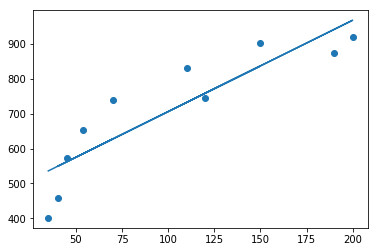

In [51]:
plt.scatter(X,Y)
plt.plot(X,Y_hat)
plt.show()

Найдем коэффициент корреляции: r и коэффициент детерминации R

In [54]:
r= b * np.std(X) / np.std(Y)
R=r**2

In [55]:
r

0.8874900920739162

In [56]:
R

0.7876386635293682

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [122]:
alpha=1e-6

In [123]:
def mse_ (b, x=X, y=Y, n=len(X)):
    return np.sum((b*x-y)**2)/n    

In [125]:
b=0.1
n=8
for i in range(10000):
    b -=alpha*(2/n)*np.sum((b*X-Y)*X)
    if i%1000 ==0:
        print('b={}', format(b))

b={} 0.2994101
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765
b={} 5.8898204201326765


*. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Представляется следующее решение. Так как имеется два парамета a(B0) и и(B1), то линейная функция получит вид Y_hat=B0+B1*X. Для нахождения каждого из парамеров необходимо найти две производных по B0 и B1 соответственно. Для B1 производная 2/n * (B0+B1*x-y)*x; для B0 производная 2/n * (B0 + B1*x-y).

In [134]:
def mse_(B0,B1, Y=Y,X=X, n=10):
    return np.sum((B0+B1*X-Y)**2)/n

zp=np.array([35,45,190,200,40,70,54,150,120,110])
ks=np.array([401,574,874,919,459,739,653,902,746,832])
X=zp
Y=ks
alpha=6e-5
B0=0.1
B1=0.1
n=10
for i in range (750000):
    Y_pred=B0+B1*X
    B0 -=alpha*(2/n)*np.sum((Y_pred-Y))
    B1 -=alpha*(2/n)*np.sum(((Y_pred-Y)*X))
 
    if i%50000==0:
        print ('Inerat:', i, 'B0=:',B0, 'B1=:',B1, 'mse=', mse_(B0,B1))

Inerat: 0 B0=: 0.1839592 B1=: 9.670468 mse= 253529.50578656566
Inerat: 50000 B0=: 347.25189913307054 B1=: 3.3339531078973446 mse= 8853.480475445138
Inerat: 100000 B0=: 423.01948526915106 B1=: 2.7762701751616845 mse= 6583.9687060965125
Inerat: 150000 B0=: 439.5588024239417 B1=: 2.6545334884502605 mse= 6475.825139901623
Inerat: 200000 B0=: 443.1691723182031 B1=: 2.6279595697922735 mse= 6470.67203557879
Inerat: 250000 B0=: 443.95728047595793 B1=: 2.6221587453085657 mse= 6470.426487137062
Inerat: 300000 B0=: 444.12931671781894 B1=: 2.6208924825068762 mse= 6470.414786609874
Inerat: 350000 B0=: 444.1668705335255 B1=: 2.6206160698197816 mse= 6470.4142290729
Inerat: 400000 B0=: 444.1750681613003 B1=: 2.6205557316549783 mse= 6470.414202505928
Inerat: 450000 B0=: 444.17685762262954 B1=: 2.6205425604284294 mse= 6470.414201239999
Inerat: 500000 B0=: 444.1772482443993 B1=: 2.6205396852794998 mse= 6470.414201179679
Inerat: 550000 B0=: 444.1773335132781 B1=: 2.620539057662853 mse= 6470.4142011768
Ine

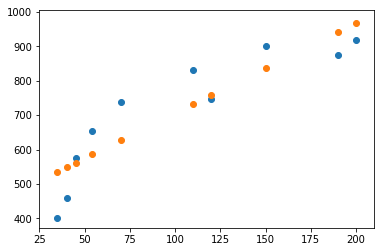